In [17]:
import cv2
import matplotlib.pyplot as plt

weights = '/content/frozen_inference_graph.pb'
config = '/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

model = cv2.dnn_DetectionModel(weights,config)

class_label = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
  class_label = fpt.read().rstrip('\n').split('\n')

model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7f4599462370>

In [43]:
img = cv2.imread('Testing_image.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

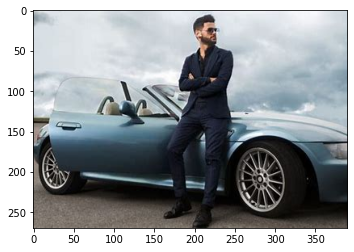

In [44]:
plt.imshow(img)

In [45]:
Class_index,confidence,box = model.detect(img,confThreshold =0.5)

In [46]:
for i in Class_index:     #Class_index contains object detected index
  print(class_label[i-1])

person
car


In [47]:
font_scale= 2
font = cv2.FONT_HERSHEY_PLAIN
for class_ind,conf,boxes in zip(Class_index,confidence,box):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,class_label[class_ind-1],(boxes[0],boxes[1]+40),font,fontScale = font_scale,color = (0,255,0),thickness = 3)


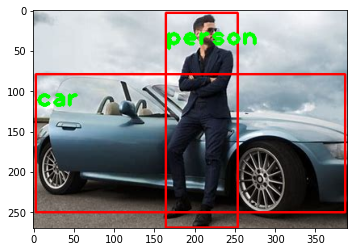

In [48]:
plt.imshow(img)

In [51]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("WEBCAM CANT OPEN")
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
while True:
  ret,frame = cap.read()
  class_idx,confidence,box1 = model.detect(frameconfThreshold = 0.55)
  if(len(class_idx)!=0):
    for class_ind,conf,boxes1 in zip(class_idx,confidence,box1):
      if(len(class_ind) <=80):
        cv2.rectangle(frame,boxes1,(255,0,0),2)
        cv2.putText(frame,class_label[class_ind-1],(boxes1[0],boxes1[1]+40),font,fontScale = font_scale,color = (0,0,0),thickness=3)
  cv2.imshow(frame)
  if cv2.waitKey(2) & 0xFF == ord('q'):
    break
cv2.release()
cv2.destroyAllWindows()

OSError: ignored